Inspired by comments on a reddit post, I decided to take the analysis further and "nest" the repetition part of the algorithm. In order words, you repeat the roll X times, then repeat the entire algorithm N times.

This analysis requires the assumption that the person will choose the results with the highest equivalent Point Buy, which is probably not true in many cases. However, I do now feel justified with my choice to use Monte Carlo sampling, as this analysis would now be extremely difficult (or impossible? anyone up to the challenge?) to solve analytically. 

This post will test the following algorithms:

* Algorithm 17- Roll 3 six-sided dice and take the sum. Repeat 6 times. Then, repeat the entire algorithm 3 times and choose the array with the highest equivalent Point Buy.
* Algorithm 18- Roll 3 six-sided dice and take the sum. Repeat 6 times. Then, repeat the entire algorithm 6 times and choose the array with the highest equivalent Point Buy.
* Algorithm 19- Roll 3 six-sided dice and take the sum. Repeat 7 times and drop the lowest. Then, repeat the entire algorithm 3 times and choose the array with the highest equivalent Point Buy.
* Algorithm 20- Roll 3 six-sided dice and take the sum. Repeat 7 times and drop the lowest. Then, repeat the entire algorithm 6 times and choose the array with the highest equivalent Point Buy.
* Algorithm 21- Roll 4 six-sided dice, drop the lowest, and take the sum. Repeat 6 times. Then, repeat the entire algorithm 3 times and choose the array with the highest equivalent Point Buy.
* Algorithm 22- Roll 4 six-sided dice, drop the lowest, and take the sum. Repeat 6 times. Then, repeat the entire algorithm 6 times and choose the array with the highest equivalent Point Buy.
* Algorithm 23- Roll 4 six-sided dice, drop the lowest, and take the sum. Repeat 7 times, drop the lowest of the 7 times. Then, repeat the entire algorithm 3 times and choose the array with the highest equivalent Point Buy.
* Algorithm 24- Roll 4 six-sided dice, drop the lowest, and take the sum. Repeat 7 times, drop the lowest of the 7 times. Then, repeat the entire algorithm 6 times and choose the array with the highest equivalent Point Buy.    
* Algorithm 25- Roll 5 six-sided dice, drop the two lowest, and take the sum. Repeat 6 times. Then, repeat the entire algorithm 3 times and choose the array with the highest equivalent Point Buy.
* Algorithm 26- Roll 5 six-sided dice, drop the two lowest, and take the sum. Repeat 6 times. Then, repeat the entire algorithm 6 times and choose the array with the highest equivalent Point Buy.    
    
As before, the results will be summarized in a tabular form at the end of this post. And, as should be expected, the Equivalent Point Buy of all of these algorithms will be greater than their associated algorithm from Part 1.

The code has been modified as follows:

In [1]:
# Refer to previous posts for more information
import numpy as np
import seaborn as sns
from random import randint
from scipy.stats import norm
from heapq import nlargest
import matplotlib.pyplot as plt
from tabulate import tabulate
vmap = {3:-16, 4:-12, 5:-9, 6:-6, 7:-4, 8:-2, 
        9:-1, 10:0, 11:1, 12:2, 13:3, 14:5, 
        15:7, 16:10, 17:13, 18:17}
% matplotlib inline

def mc_solution3(num_hist, num_dice, num_reps, num_nest, 
                drop_low_dice=False, drop_low_rep=False):
    raw_res = []
    val_res = []
    for _ in range(num_hist):
        inst_raw = []
        inst_val = []
        for _ in range(num_nest):
            roll_sums = []
            # Repeat the dice rolling [num_reps] time (Part D)
            for _ in range(num_reps):
                # Part A- Roll [num_dice] dice
                rolls = [randint(1,6) for _ in range(num_dice)]
                # Part B- Modify the dice roll
                if drop_low_dice:
                    rolls = nlargest(3,rolls)
                # Part C- Sum the values
                roll_sums.append(sum(rolls))
            # Part E- Modify the repetitions
            if drop_low_rep:
                roll_sums = nlargest(6,roll_sums)
            # Part Fa- Find the average raw value and save to the raw_res
            avg_roll_sums = np.median(roll_sums)
            inst_raw.append(avg_roll_sums)
            # Part Fb- Find the Point Buy value and save to the val_res
            point_buy_sum = np.sum([vmap[value] for value in roll_sums])
            inst_val.append(point_buy_sum)           
        ind = np.argmax(inst_val)    
        raw_res.append(inst_raw[ind])  
        val_res.append(inst_val[ind])
    return raw_res, val_res

def plot_hist(raw_data, val_data, title, bins):
    f,(ax1,ax2) = plt.subplots(1, 2, figsize=(8,5))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.suptitle(title, fontsize=14)
    sns.distplot(raw_data, kde=False, bins=bins, fit=norm, ax=ax1)       
    ax1.text(0.05, 0.95, build_text(raw_data), transform=ax1.transAxes, 
             fontsize=12, verticalalignment='top', bbox=props)
    ax1.set_xlabel('Raw Results')   
    ax1.set_ylabel('Probability')
    ax1.set_xlim([3,18])
    sns.distplot(val_data, kde=False, fit=norm, ax=ax2)    
    ax2.text(0.05, 0.95, build_text(val_data), transform=ax2.transAxes, 
             fontsize=12, verticalalignment='top', bbox=props)
    ax2.set_xlabel('Equivalent Point Buy')
    
def build_text(data):
    ret_string = '$\mu$={:.1f}\n$\sigma$={:.2f}\n95%={:.0f}\n5%={:.0f}'.format(
                 np.mean(data), np.std(data), np.percentile(data,95), 
                 np.percentile(data,5))
    return ret_string

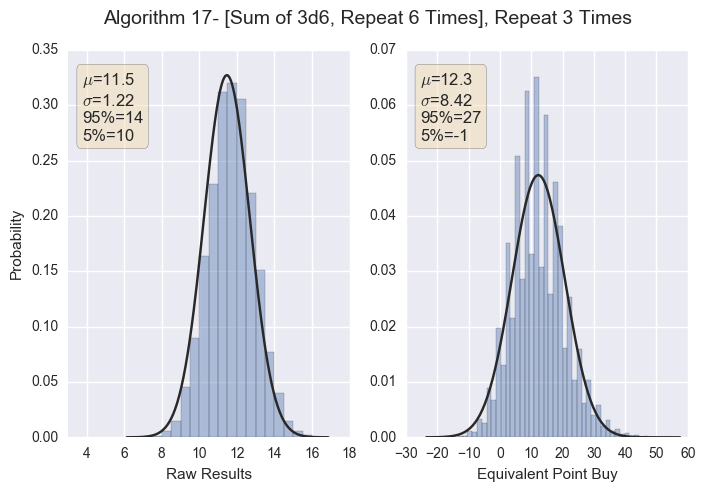

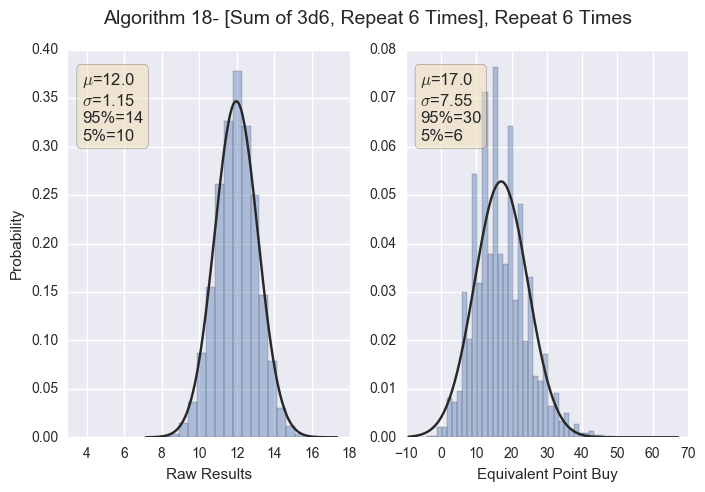

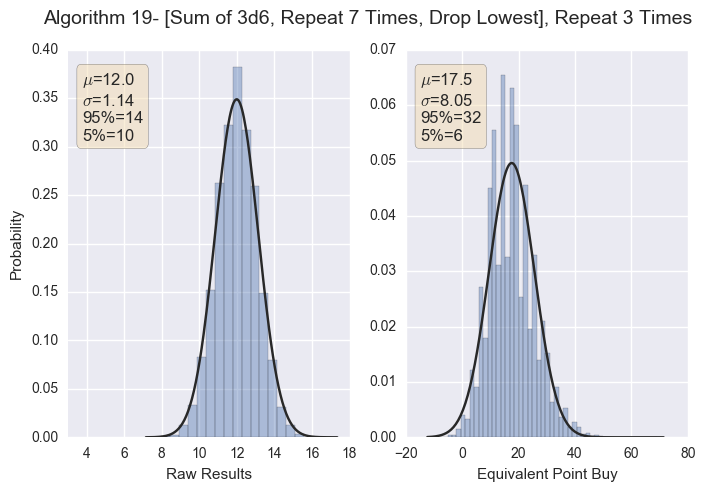

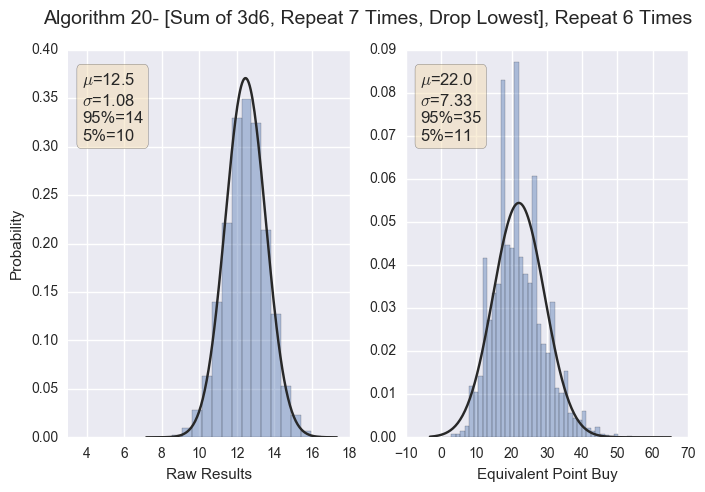

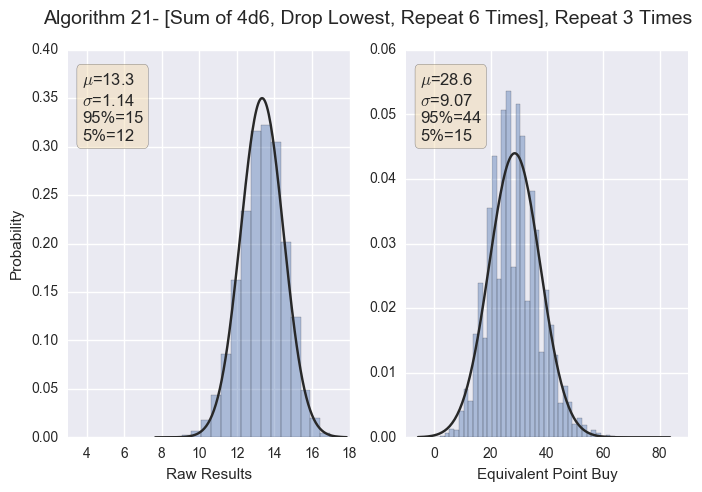

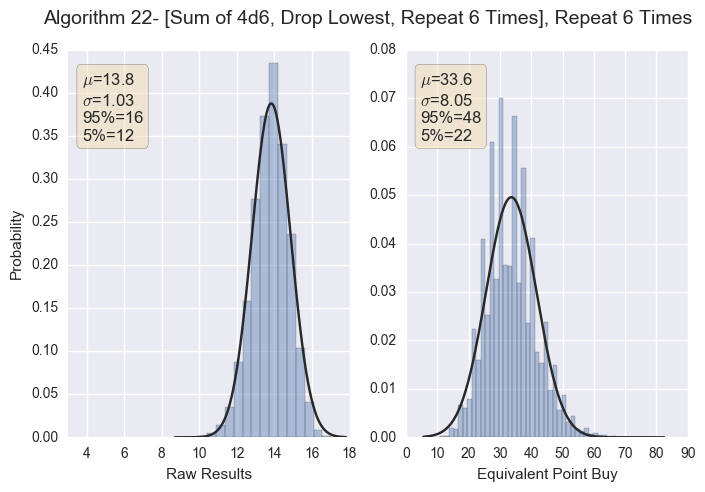

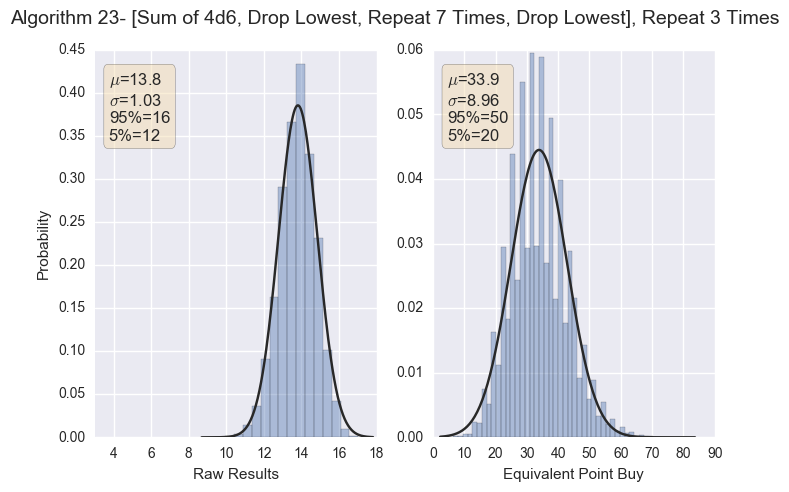

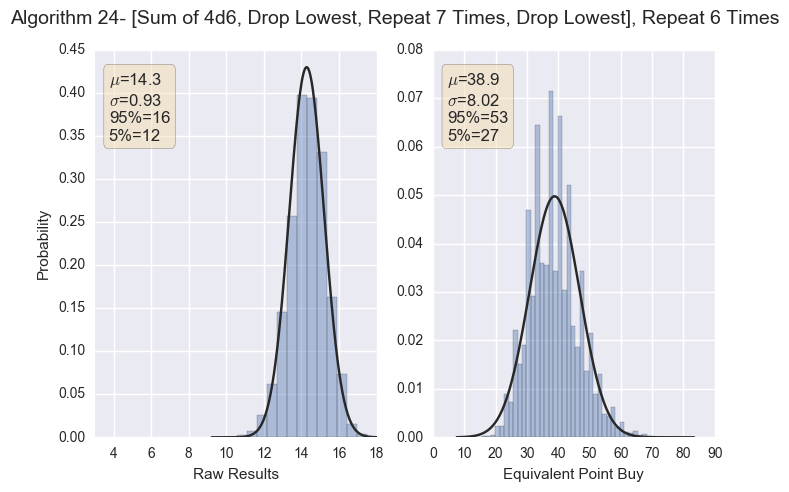

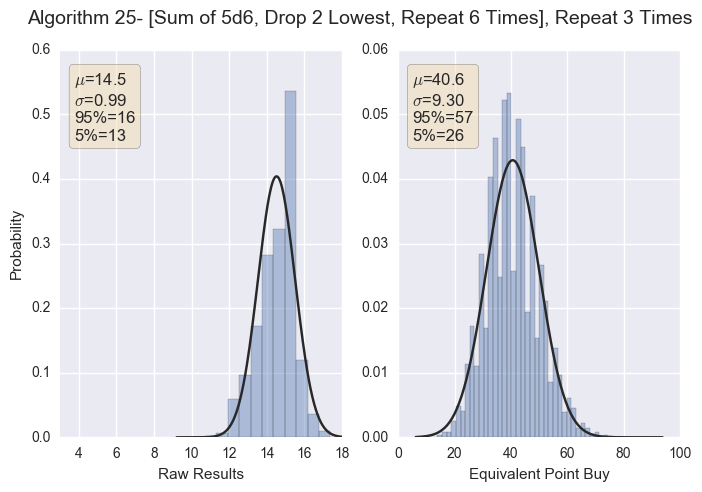

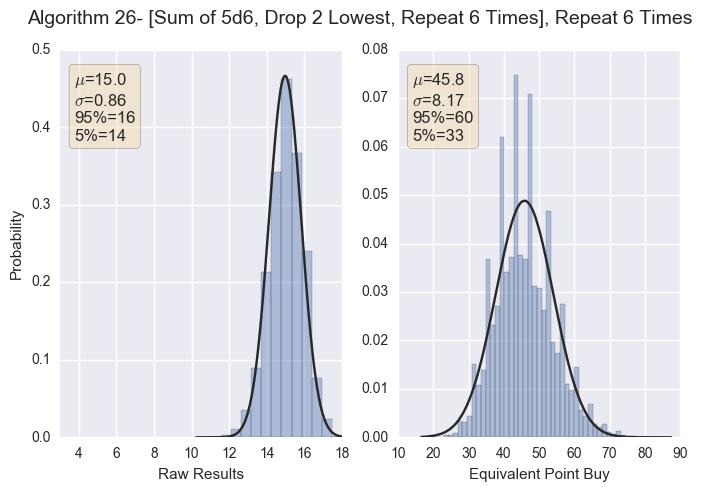

In [2]:
num_hist = 10**5
alg1_raw, alg1_val = mc_solution3(num_hist, 3, 6, 3)
alg2_raw, alg2_val = mc_solution3(num_hist, 3, 6, 6)
alg3_raw, alg3_val = mc_solution3(num_hist, 3, 7, 3,
                                  drop_low_rep=True)
alg4_raw, alg4_val = mc_solution3(num_hist, 3, 7, 6,
                                  drop_low_rep=True)
alg5_raw, alg5_val = mc_solution3(num_hist, 4, 6, 3, 
                                  drop_low_dice=True)
alg6_raw, alg6_val = mc_solution3(num_hist, 4, 6, 6, 
                                  drop_low_dice=True)
alg7_raw, alg7_val = mc_solution3(num_hist, 4, 7, 3, 
                                  drop_low_dice=True, 
                                  drop_low_rep=True)
alg8_raw, alg8_val = mc_solution3(num_hist, 4, 7, 6, 
                                  drop_low_dice=True, 
                                  drop_low_rep=True)
alg9_raw, alg9_val = mc_solution3(num_hist, 5, 6, 3,
                                  drop_low_dice=True)
alg10_raw, alg10_val = mc_solution3(num_hist, 5, 6, 6,
                                  drop_low_dice=True)
plot_hist(alg1_raw, alg1_val,"Algorithm 17- [Sum of 3d6, "+
          "Repeat 6 Times], Repeat 3 Times", 20)
plot_hist(alg2_raw, alg2_val,"Algorithm 18- [Sum of 3d6, "+
          "Repeat 6 Times], Repeat 6 Times", 20)
plot_hist(alg3_raw, alg3_val,"Algorithm 19- [Sum of 3d6, "+
          "Repeat 7 Times, Drop Lowest], Repeat 3 Times", 20)
plot_hist(alg4_raw, alg4_val,"Algorithm 20- [Sum of 3d6, "+
          "Repeat 7 Times, Drop Lowest], Repeat 6 Times", 18)
plot_hist(alg5_raw, alg5_val,"Algorithm 21- [Sum of 4d6, Drop Lowest, "+
          "Repeat 6 Times], Repeat 3 Times", 18)
plot_hist(alg6_raw, alg6_val,"Algorithm 22- [Sum of 4d6, Drop Lowest, "+
          "Repeat 6 Times], Repeat 6 Times", 18)
plot_hist(alg7_raw, alg7_val,"Algorithm 23- [Sum of 4d6, Drop Lowest, "+
          "Repeat 7 Times, Drop Lowest], Repeat 3 Times", 18)
plot_hist(alg8_raw, alg8_val,"Algorithm 24- [Sum of 4d6, Drop Lowest, "+
          "Repeat 7 Times, Drop Lowest], Repeat 6 Times", 16)
plot_hist(alg9_raw, alg9_val,"Algorithm 25- [Sum of 5d6, Drop 2 Lowest, "+
          "Repeat 6 Times], Repeat 3 Times", 14)
plot_hist(alg10_raw, alg10_val,"Algorithm 26- [Sum of 5d6, Drop 2 Lowest, "+
          "Repeat 6 Times], Repeat 6 Times", 14)

In [3]:
from tabulate import tabulate
def br(data, description):
    return [description, round(np.mean(data),1), round(np.std(data),2), 
            int(np.percentile(data,5)), int(np.percentile(data,95))]
raw_res = [["Description","Mean","Std","5%","95%"],
           br(alg1_raw, "17. [Sum 3d6, Repeat 6], Repeat 3"),
           br(alg2_raw, "18. [Sum 3d6, Repeat 6], Repeat 6"),
           br(alg3_raw, "19. [Sum 3d6, Repeat 7, Drop 1], Repeat 3"),
           br(alg4_raw, "20. [Sum 3d6, Repeat 7, Drop 1], Repeat 6"),        
           br(alg5_raw, "21. [Sum 4d6, Drop 1, Repeat 6], Repeat 3"),
           br(alg6_raw, "22. [Sum 4d6, Drop 1, Repeat 6], Repeat 6"),
           br(alg7_raw, "23. [Sum 4d6, Drop 1, Repeat 7, Drop 1], " +
              "Repeat 3"),
           br(alg8_raw, "24. [Sum 4d6, Drop 1, Repeat 7, Drop 1], " +
              "Repeat 6"),
           br(alg9_raw, "25. [Sum 5d6, Drop 2, Repeat 6], " +
              "Repeat 3"),
           br(alg10_raw, "26. [Sum 5d6, Drop 2, Repeat 6], " +
              "Repeat 6")]
print("Raw Results")
print(tabulate(raw_res))
val_res = [["Description","Mean","Std","5%","95%"],
           br(alg1_val, "17. [Sum 3d6, Repeat 6], Repeat 3"),
           br(alg2_val, "18. [Sum 3d6, Repeat 6], Repeat 6"),
           br(alg3_val, "19. [Sum 3d6, Repeat 7, Drop 1], Repeat 3"),
           br(alg4_val, "20. [Sum 3d6, Repeat 7, Drop 1], Repeat 6"),        
           br(alg5_val, "21. [Sum 4d6, Drop 1, Repeat 6], Repeat 3"),
           br(alg6_val, "22. [Sum 4d6, Drop 1, Repeat 6], Repeat 6"),
           br(alg7_val, "23. [Sum 4d6, Drop 1, Repeat 7, Drop 1], " +
              "Repeat 3"),
           br(alg8_val, "24. [Sum 4d6, Drop 1, Repeat 7, Drop 1], " +
              "Repeat 6"),
           br(alg9_val, "25. [Sum 5d6, Drop 2, Repeat 6], " +
              "Repeat 3"),
           br(alg10_val, "26. [Sum 5d6, Drop 2, Repeat 6], " +
              "Repeat 6")]
print("\nEquivalent Point Buy")
print(tabulate(val_res))

Raw Results
-------------------------------------------------  ----  ----  --  ---
Description                                        Mean  Std   5%  95%
17. [Sum 3d6, Repeat 6], Repeat 3                  11.5  1.22  9   13
18. [Sum 3d6, Repeat 6], Repeat 6                  12.0  1.15  10  14
19. [Sum 3d6, Repeat 7, Drop 1], Repeat 3          12.0  1.14  10  14
20. [Sum 3d6, Repeat 7, Drop 1], Repeat 6          12.5  1.08  10  14
21. [Sum 4d6, Drop 1, Repeat 6], Repeat 3          13.3  1.14  11  15
22. [Sum 4d6, Drop 1, Repeat 6], Repeat 6          13.8  1.03  12  15
23. [Sum 4d6, Drop 1, Repeat 7, Drop 1], Repeat 3  13.8  1.03  12  15
24. [Sum 4d6, Drop 1, Repeat 7, Drop 1], Repeat 6  14.3  0.93  12  15
25. [Sum 5d6, Drop 2, Repeat 6], Repeat 3          14.5  0.99  13  16
26. [Sum 5d6, Drop 2, Repeat 6], Repeat 6          15.0  0.86  13  16
-------------------------------------------------  ----  ----  --  ---

Equivalent Point Buy
-------------------------------------------------  --

### Interpretation
Adding again to the algorithms analyzed in the previous two posts, these dice rolling algorithms should fall within the following buckets:

**5-Point Buy**
* Sum of 3d6, Repeat 6

**10-Point Buy**
* Sum of 3d6, Repeat 7, Drop Lowest
* (Low Variance) [Sum of 3d6, Repeat 6], Repeat 3
* (High Variance) Sum of 2d8+2, Repeat 6

**15-Point Buy**
* Sum of 3d6, Repeat 9, Keep Best 6
* (Low Variance) Sum of 4d4+2, Repeat 6
* (Low Variance) [Sum of 3d6, Repeat 6], Repeat 6
* (Low Variance) [Sum of 3d6, Repeat 7, Drop 1], Repeat 3
* (High Variance) Sum of 2d8+2, Repeat 7, Drop Lowest

**20-Point Buy**
* Sum of 4d6, Drop Lowest, Repeat 6
* (Low Variance) Sum of 4d4+2, Repeat 7, Drop Lowest
* (Low Variance) [Sum of 3d6, Repeat 7, Drop 1], Repeat 6

**25-Point Buy**
* Sum of 4d6, Drop Lowest, Repeat 7, Drop Lowest
* Sum of 2d6, Add 6, Repeat 6
* (High Variance) Sum of 1d12+6, Repeat 6

**30-Point Buy**
* Sum of 5d6, Drop the 2 Lowest, Repeat 6
* (Low Variance) Sum of 3d4+6, Repeat 6
* (Low Variance) [Sum of 4d6, Drop Lowest, Repeat 6], Repeat 3

**35-Point Buy**
* (Low Variance) [Sum of 4d6, Drop Lowest, Repeat 6], Repeat 6
* (Low Variance) [Sum of 4d6, Drop Lowest, Repeat 7, Drop Lowest], Repeat 3
* (High Variance) Sum of 1d10+8, Repeat 6 Times

**40-Point Buy**
* (Low Variance) [Sum of 4d6, Drop Lowest, Repeat 7, Drop Lowest], Repeat 6
* (Low Variance) [Sum of 5d6, Drop the 2 Lowest, Repeat 6], Repeat 3

**45-Point Buy**
* (Low Variance) Sum of 2d4+10, Repeat 6
* (Low Variance) [Sum of 5d6, Drop the 2 Lowest, Repeat 6], Repeat 6
* (High Variance) Sum of 1d8+10, Repeat 6

Remember: If you're allowing players to individually decide whether to use Point Buy or random rolling, this table can be consulted to fairly select which method to use. Random rolling is, of course, random, so the player might get values much lower or higher than the equivalent Point Buy above. In general, you probably want to choose the (Low Variance) option for each bucket, if it is available, unless you strongly prefer six-sided dice.